In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-integration-compare)

First consider the integral 

$$
\int_{-1}^1 \frac{1}{1+4x^2} \, dx = \arctan(2).
$$

In [2]:
f(x)= 1 / (1 + 4x^2);
exact = atan(2);

We compare the two spectral integration methods for a range of $n$ values.

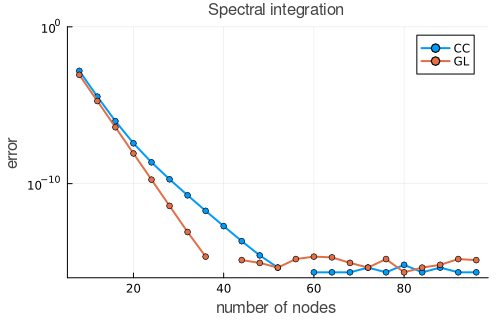

In [3]:
n = 8:4:96
err = zeros(length(n), 2)
for (k, n) in enumerate(n)
  err[k, 1] = abs(exact - FNC.ccint(f, n)[1])
  err[k, 2] = abs(exact - FNC.glint(f, n)[1])
end

err[iszero.(err)] .= NaN    # remove from log-scale plot
plot(n, err, m=:o, label=["CC" "GL"],
    xaxis=("number of nodes"),  yaxis=(:log10, "error", [1e-16, 1]), 
    title="Spectral integration")

(The missing dots are where the error is exactly zero.) Gauss–Legendre does converge faster here, but at something less than twice the rate.

Now we try a more sharply peaked integrand:
 
 $$\int_{-1}^1 \frac{1}{1+16x^2} \, dx = \frac{1}{2}\arctan(4).$$

In [4]:
f(x) = 1 / (1 + 16x^2);
exact = atan(4) / 2;

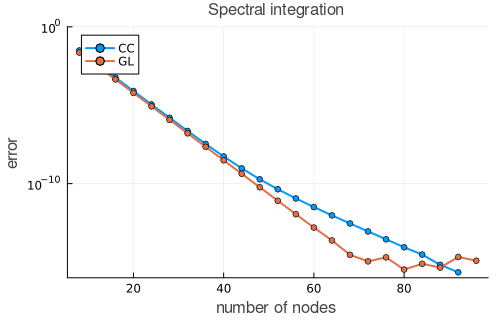

In [5]:
n = 8:4:96
err = zeros(length(n), 2)
for (k,n) in enumerate(n)
  err[k, 1] = abs(exact - FNC.ccint(f, n)[1])
  err[k, 2] = abs(exact - FNC.glint(f, n)[1])
end

err[iszero.(err)] .= NaN    # remove from log-scale plot
plot(n, err, m=:o, label=["CC" "GL"],
    xaxis=("number of nodes"),  yaxis=(:log10, "error", [1e-16, 1]), 
    title="Spectral integration")

The two are very close until about $n=40$, when the Clenshaw–Curtis method slows down.

Now let's compare the spectral performance to that of our earlier adaptive method in `intadapt`. We will specify varying error tolerances and record the error as well as the total number of evaluations of $f$.

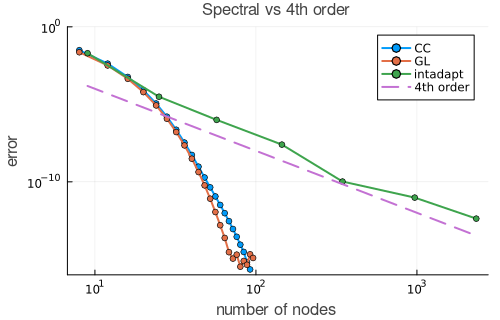

In [6]:
tol = 10 .^(-2.0:-2:-14)
n = zeros(size(tol))  
errAdapt = zeros(size(tol))
for (k, tol) in enumerate(tol)
  Q, t = FNC.intadapt(f, -1, 1, tol)
  errAdapt[k] = abs(exact - Q)
  n[k] = length(t)
end

errAdapt[iszero.(errAdapt)] .= NaN
plot!(n, errAdapt, m=:o, label="intadapt")
plot!(n, n.^(-4), l=:dash, label="4th order",
        xaxis=(:log10),  title="Spectral vs 4th order" )

At the core of `intadapt` is a fourth-order formula, and the results track that rate closely. For all but the most relaxed error tolerances, both spectral methods are far more efficient than the low-order counterpart. For other integrands, particularly those that vary nonuniformly across the interval, the adaptive method might be more competitive.